In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reload data and drop unnecessary columns
X = pd.read_csv(r"/content/drive/MyDrive/climate-wins-datasets/weather-cleaned.csv", index_col = False)
y = pd.read_csv(r"/content/drive/MyDrive/climate-wins-datasets/pleasant-weather.csv", index_col = False)
X = X.drop(['DATE', 'MONTH'], axis = 1)
y = y.drop(['DATE'], axis = 1)

In [ ]:
X.shape

(22950, 135)

In [ ]:
y.shape

(22950, 15)

In [ ]:
# Create a list of the columns containing "BUDAPEST" in their names

budapest_list = list(x for x in X.columns if x.find('BUDAPEST') >=0)
budapest_list

# Create a dataframe with those as columns
X_budapest = X[budapest_list]
X_budapest

# budapest y only
y_budapest = y['BUDAPEST_pleasant_weather']
y_budapest

,BUDAPEST_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [ ]:
X_budapest.shape

(22950, 9)

In [ ]:
y_budapest.shape

(22950,)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X_budapest),np.array(y_budapest),random_state = 42)

In [ ]:
# Create a RF classifier, make sure to trust this noteobok or it may not work
clf = RandomForestClassifier(n_estimators = 100, random_state = 30)#, max_depth=5)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=30)

In [ ]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
# Get important metrics
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision Score: ", metrics.precision_score(y_test, y_pred, average = 'micro'))
print("Recall Score: ", metrics.recall_score(y_test, y_pred, average = 'micro'))
print("F1 Score: ", metrics.f1_score(y_test, y_pred, average = 'micro'))

Model Accuracy:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


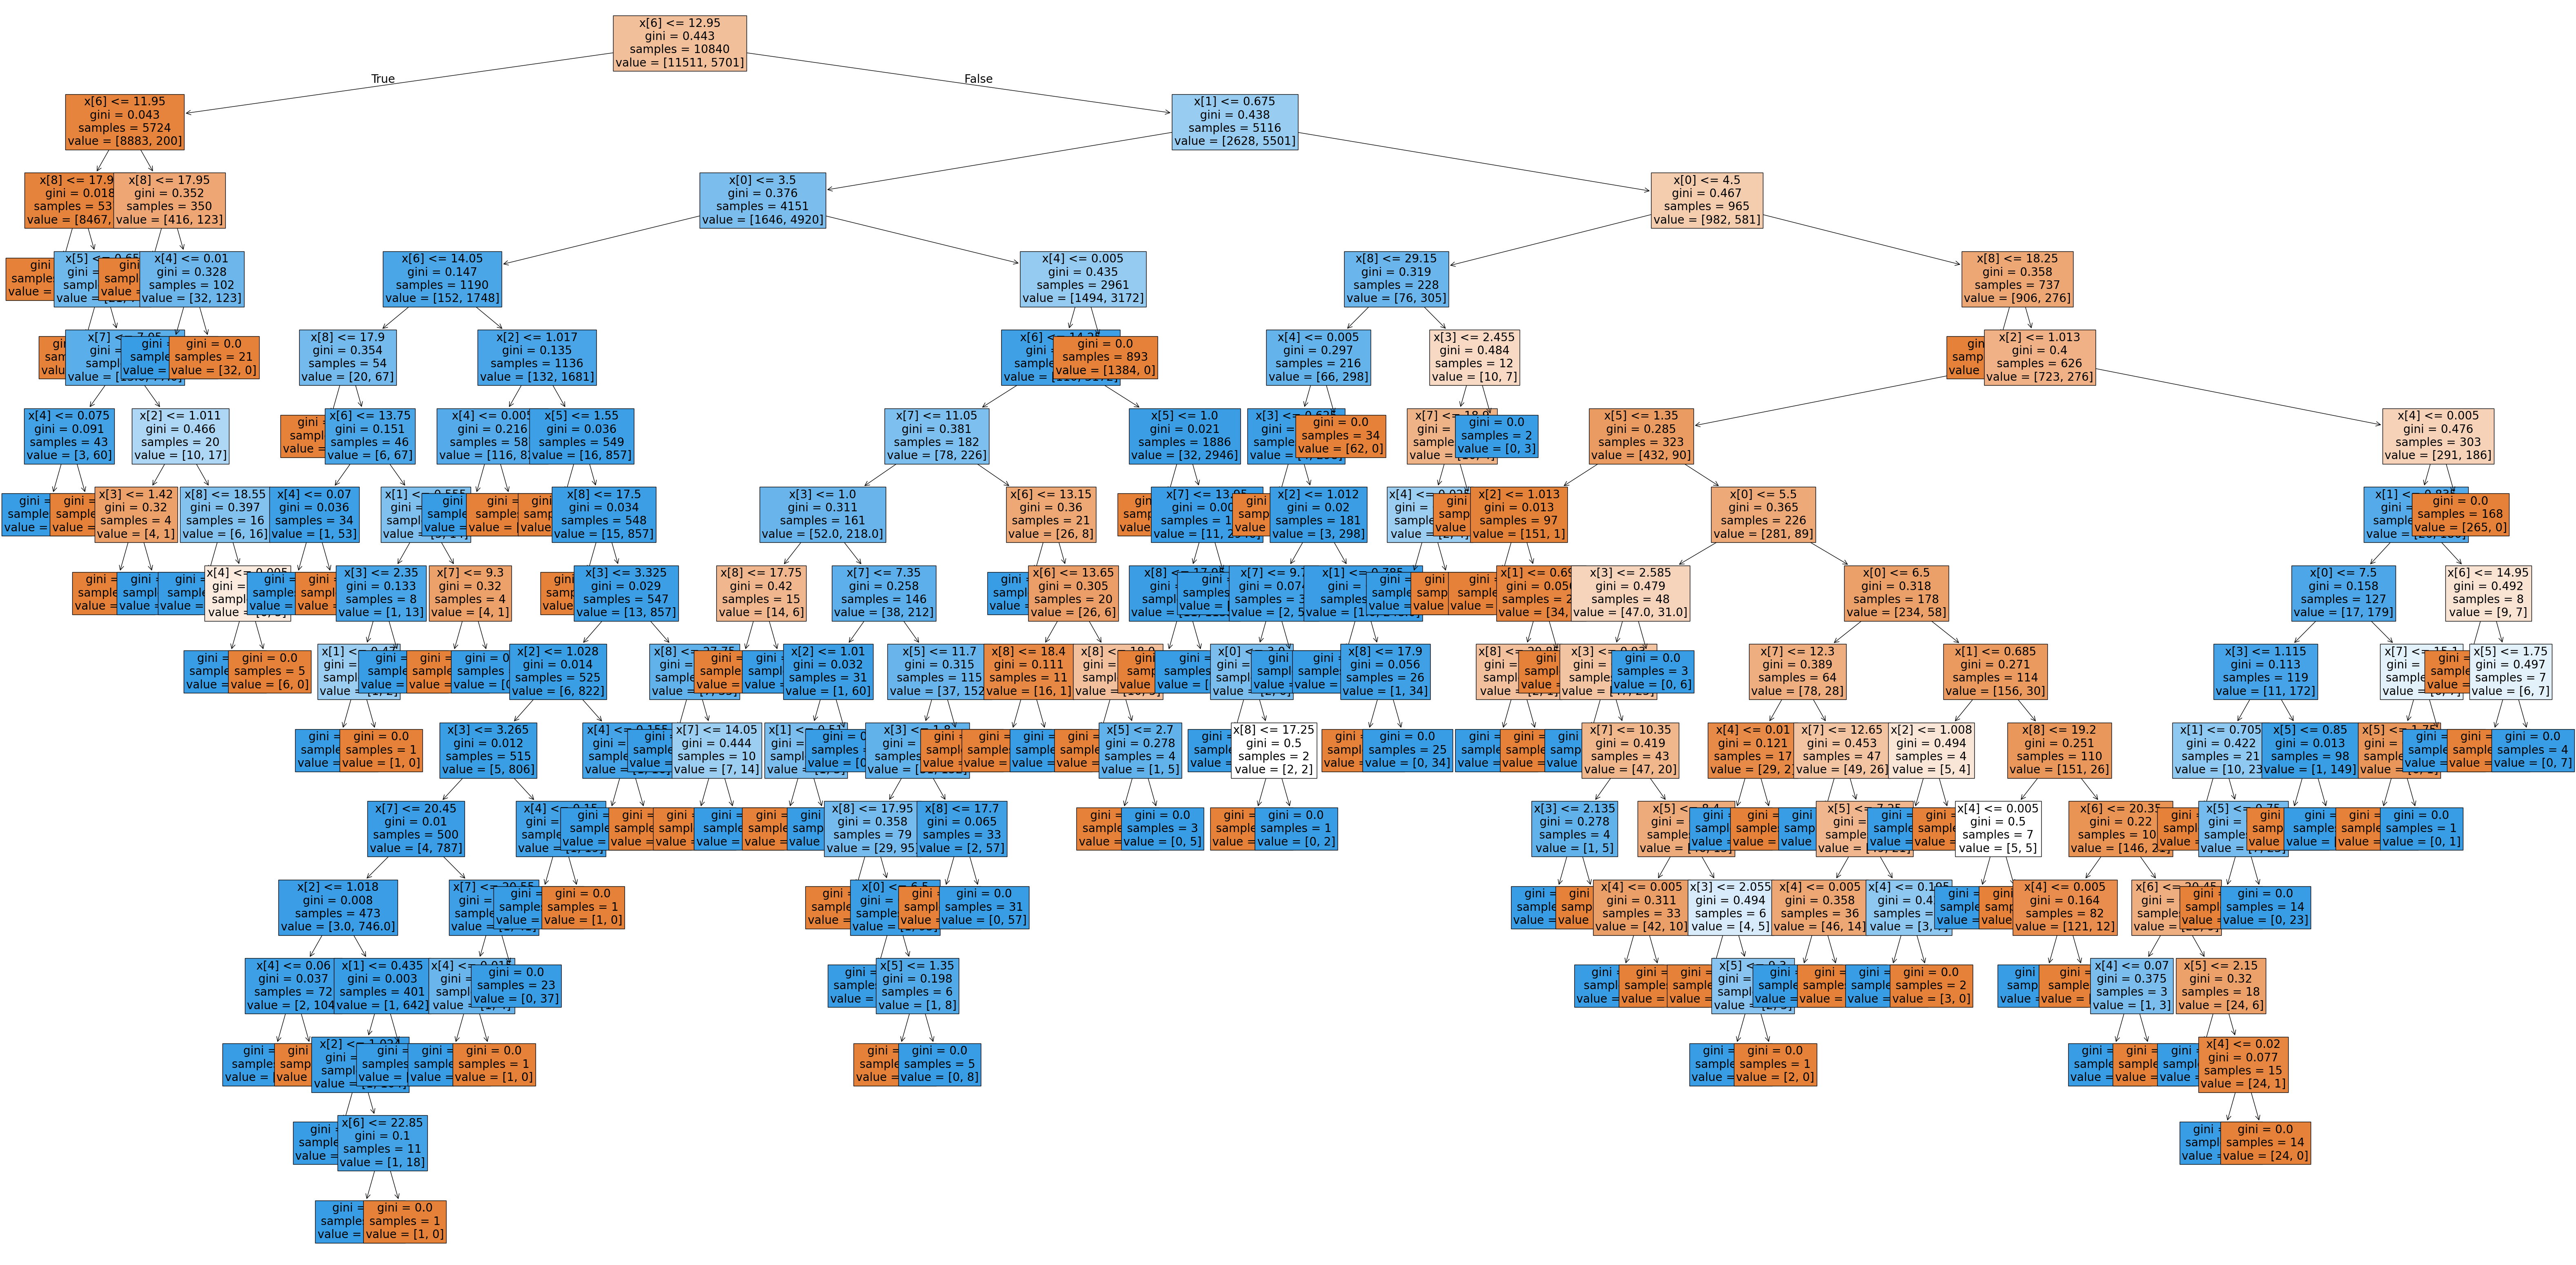

In [ ]:
# Plot tree
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);
fig.show()

In [ ]:
# Retrieve feature importances from the trained model
newarray = clf.feature_importances_
print(newarray)

[0.01254604 0.00508217 0.00505186 0.0686472  0.34448178 0.05822351
 0.15409361 0.07233011 0.27954372]


In [ ]:
wx_list = [feature.replace('budapest_', '') for feature in budapest_list]
wx_list

['BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max']

[0, 1, 2, 3, 4, 5, 6, 7, 8]


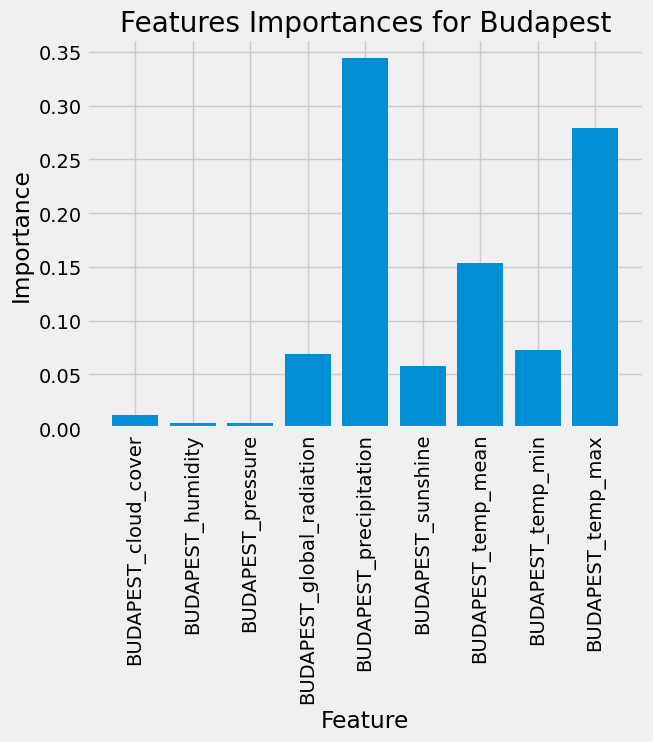

In [ ]:
# Plot the results
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(x_values)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Budapest');

plt.show()